# SUPERVISED MACHINE LEARNING: DECISION TREE

This report will analyse the dataset of TELCO (available in Kaggle) and its more than 7,000 customers. This dataset includes 16 features that could affect the behaviour of clients when deciding to cancel the service and choose a different telecommunications provider.

This project includes:

**A) Exploratory data analysis:**
Exploring the dataset, identifying trends, visualising data, viewing statistics and generating insights.

**B) Feature selection:** 
Calculating associations between features. Selecting the most relevant attributes for the machine learning model.

**C) Model building:**
Building a decision tree model that helps to predict customer churn. Dividing dataset into train and test data (80-20).

This model would ultimately help the company determine patterns and behaviours that could lead customers to cancel the service and choose another provider.


# A) Exploratory data analysis

1) **Importing the Python libraries** that I am going to use for my data analysis:

Pandas (data manipulation), Numpy (numeric operations), Seaborn (visualisations) and Matplotlib (visualisations).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2) **Reading the CSV file of Telco** and show the top 3 values just to confirm that it is correctly loaded.

In [3]:
df = pd.read_csv("BDA601_Assessment 2_Telco-Customer-Churn - Modified.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,No,No,Yes,No,No,One year,No,Mailed check,1889.50,No
2,3668-QPYBK,Male,0,No,2,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes


3) **Running df.info()** to see a summary of the data types and null/non-null values that my dataset contains. This is a useful command to have a quick view of our dataset.

As the result shows, most of the attributes are "object" type, which means categorical data. **Total entries (rows): 7043.**

Initially, the column "TotalCharges" showed "object" as data type, but this should actually be a FLOAT. Then, checking the dataset, I found some missing values that should be 0. I filled those values with 0 and now it is all correct.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingMovies   7043 non-null   object 
 11  Contract          7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

4) **Exploring the dataset**, considering that my target column is "CHURN", which describes if the customer stays with TELCO service ('No') or cancel the service ('Yes'). 

I use pandas and matplotlib libraries to show what % of people decided to churn. As the pie chart shows, **26.5% of customers decided to churn**, and 73.5% stay with TELCO service. This percentage is definitely high, because out of 4 customers, 1 is not happy with the service and for some reason is choosing another provider.

No     5174
Yes    1869
Name: Churn, dtype: int64


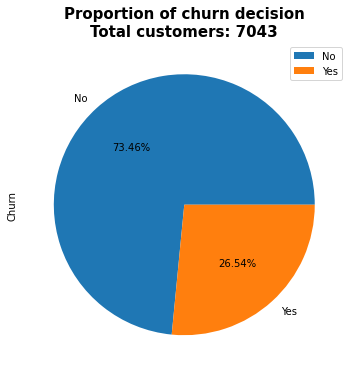

In [5]:
Churn_counts = df['Churn'].value_counts()
df2 = pd.DataFrame({'Churn': Churn_counts})
#print(df2.Churn['No']+df2.Churn['Yes'])
print(df2.Churn)
df2.plot.pie(y = 'Churn', figsize=(6,6), autopct='%1.2f%%')
plt.title('Proportion of churn decision' + '\nTotal customers: 7043', fontweight='bold', fontsize=15)
plt.show()

5) The first attribute that I analyse is **GENDER**. I would like to find out if there is any pattern in males or females when deciding to churn. 

As the graph shows, **there is not any signal that the gender affect the decision of customers.**

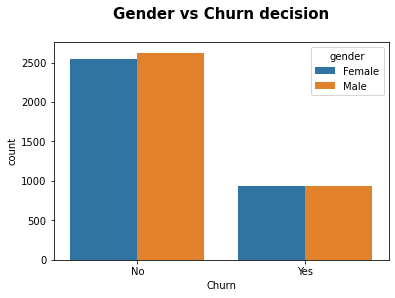

In [6]:
sns.countplot(x='Churn', hue='gender', data = df)
plt.title("Gender vs Churn decision\n",fontweight='bold', fontsize=15)
plt.show()

6) The second attribute that I analyse is **Payment Method**. I would like to see what is the preferred payment method among customers. 

As the graphic shows, **the preferred payment method is ELECTRONIC CHECK.**

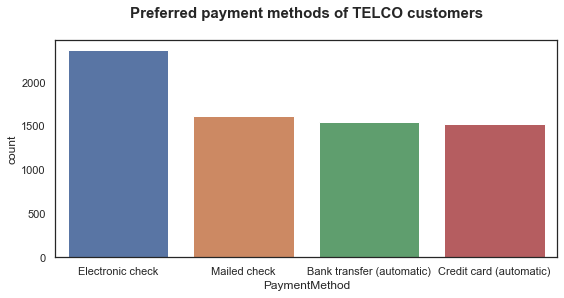

In [7]:
sns.set(style='white')
plt.figure(figsize=(9,4))
ax = sns.countplot(x='PaymentMethod', data=df)
plt.title("Preferred payment methods of TELCO customers\n", fontweight='bold', fontsize=15)
plt.show()

7) Another important attribute for this analysis is **TOTAL CHARGES**. This refers to the total amount that has been charged to each customer during all the time when utilising the service.

The first graph shows that **NON CHURN customers** represents more than 1.2e7 dollars, which is **about 12 million dollars**. On the other hand, **CHURN customers represented about 2.5 million dollars.** 

The second graph shows that **NON CHURN customers had average total charges of 2500 dollars**, and **CHURN customers a considerably smaller average total charges of 1500 dollars.**

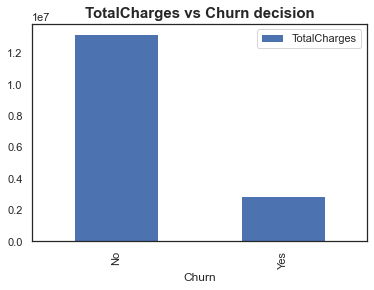

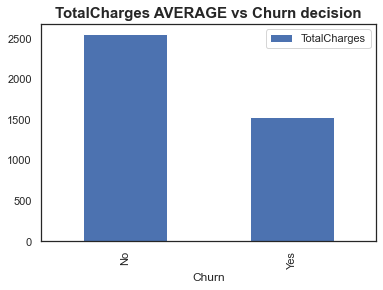

In [8]:
df.groupby('Churn').sum().plot.bar(y='TotalCharges')
plt.title("TotalCharges vs Churn decision", fontweight='bold', fontsize=15)
plt.show()
df.groupby('Churn').mean().plot.bar(y='TotalCharges')
plt.title("TotalCharges AVERAGE vs Churn decision", fontweight='bold', fontsize=15)
plt.show()

8) The last insight for this section is the **type of contract** that customers choose. 

As the graph shows, **MOST of the customers that decided to churn had a MONTH-TO-MONTH contract**. This means that when customers register with a month-to-month contract, they will be much more likely to cancel the service and migrate to another provider.

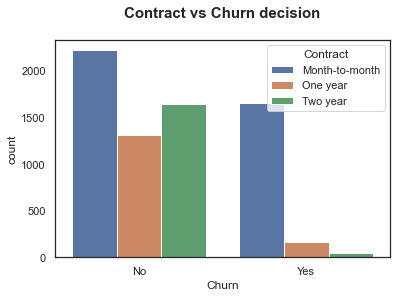

In [9]:
sns.countplot(x='Churn', hue='Contract', data = df)
plt.title("Contract vs Churn decision\n",fontweight='bold', fontsize=15)
plt.show()

# B) Feature selection


**1) Analysing the ASSOCIATION between dependants and independent (churn) attributes.** 
Association concept is very similar to "Correlation", and it represents the strength of relationship between 2 variables. This function allows both categorical and numeric values.**

I use the function "associations", available in the library "dython". Further information about this library can be found at: https://github.com/shakedzy/dython

- DYTHON library can be installed directly from the Terminal as:   **pip install dython**



As shown in the Heat Map below, there are several grades of association between 0 and 1. The closer the value is to '1', the stronger the relationship is.

When focusing on the attribute CHURN, I identify that **the 5 most relevant attributes** with closer association are:
- tenure (0.35)
- TotalCharges (0.20)
- Contract (0.17)
- SeniorCitizen (0.15)
- TechSupport (0.11)

The rest of attributes will be deleted because they have low association to CHURN, and it will not be relevant to include them in the predictive model. Also, the attribute 'customerID' will be removed because it is not relevant to the model.

Lastly, I also identified that **TENURE and TOTALCHARGES are highly associated (0.83) between them**. Therefore, I will only keep one of them, so the predictive model will be more efficient, simple and this will not impact the predictions. 

Then, the **final attributes that will be considered for predicting Churn are four:**
- tenure (0.35)
- Contract (0.17)
- SeniorCitizen (0.15)
- TechSupport (0.11)

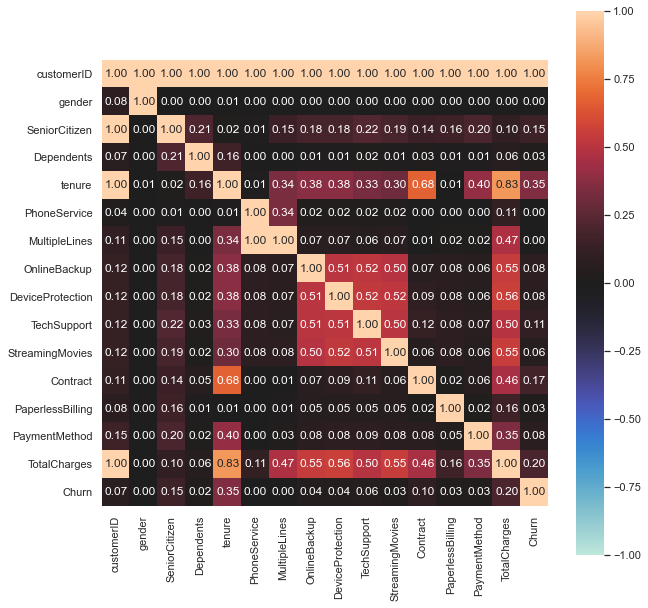

{'corr':                   customerID    gender  SeniorCitizen  Dependents    tenure  \
 customerID          1.000000  1.000000       1.000000    1.000000  1.000000   
 gender              0.078230  1.000000       0.001874    0.000091  0.005106   
 SeniorCitizen       1.000000  0.001874       1.000000    0.211185  0.016567   
 Dependents          0.068909  0.000080       0.211185    1.000000  0.159712   
 tenure              1.000000  0.005106       0.016567    0.159712  1.000000   
 PhoneService        0.035900  0.000030       0.008576    0.000003  0.008448   
 MultipleLines       0.106338  0.000064       0.146643    0.000517  0.343382   
 OnlineBackup        0.119644  0.000137       0.182774    0.021417  0.375681   
 DeviceProtection    0.119617  0.000026       0.183071    0.019960  0.375982   
 TechSupport         0.117276  0.000068       0.224050    0.027187  0.332625   
 StreamingMovies     0.120272  0.000082       0.188962    0.015710  0.299601   
 Contract            0.112732  0

In [10]:
from dython.nominal import associations
associations(df, theil_u=True, figsize=(10, 10))

2) The most relevant attributes to use in the predictive model are **'tenure',  'Contract', 'SeniorCitizen' and 'TechSupport'.**

In this step, I remove the non relevant columns from the dataframe.

Lastly, I show the first 5 rows just to confirm that the new table "dfselection" is correct.

In [11]:
dfselection = df.drop(columns=['customerID', 'gender', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TotalCharges',
                    'StreamingMovies','PaperlessBilling', 'PaymentMethod'])
dfselection.head(5)

,SeniorCitizen,tenure,TechSupport,Contract,Churn
0,0,1,No,Month-to-month,No
1,0,34,No,One year,No
2,0,2,No,Month-to-month,Yes
3,0,45,Yes,One year,No
4,0,2,No,Month-to-month,Yes


3) As a good practice, I will run **info()** to see how the next dataframe 'dfcleaned' is composed and how many rows and data types it has.

As the result shows, it has various data types, including **2 Integers and 3 objects**. Therefore, I will need to do additional steps (preprocessing) before start with predictive modelling.

In [12]:
dfselection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SeniorCitizen  7043 non-null   int64 
 1   tenure         7043 non-null   int64 
 2   TechSupport    7043 non-null   object
 3   Contract       7043 non-null   object
 4   Churn          7043 non-null   object
dtypes: int64(2), object(3)
memory usage: 275.2+ KB


4) To be able to model a Decision Tree, **I will need to prepare my data and convert all the categorical values (objects) into numbers**, so the predictive model can be trained properly. 

Commonly the values of each attribute are divided into 0 and 1. For example, in the case of **SENIORCITIZEN**, I don't need to change anything because the values are 0 or 1. However, in the case of **TECHSUPPORT**, the values are 'objects', including 'NO', 'YES', AND 'NO INTERNET SERVICE'. Therefore, I will replace these values for numbers, e.g. 0, 1 and 2. 

In the case of the attribute **CONTRACT**, as the values are 'Month-to-month', 'One year', and 'Two year', I will replace them for '0', '1', and '2'. Regarding the attribute **CHURN**, as the values are 'NO' and 'YES', I will replace them for '0' and '1' respectively. 

Lastly, to prepare the data of the attribute **TENURE**, I will need to do additional steps, as it has 72 different values, from 0 to 72. Therefore, the values of TENURE will be divided into ranges as follows:

- TENURE 0 TO 5 MONTHS = '0'
- TENURE 6 TO 11 MONTHS = '1'
- TENURE 12 TO 47 MONTHS = '2'
- TENURE 48 OR HIGHER MONTHS = '3'

Therefore, the only possible values for TENURE will be '0', '1', '2', and '3'. Having only four values will help me to properly develop the Decision Tree model.

5) I create the new dataframe called **"dfnumeric"**, which is a copy of **"dfselection"**, so I can keep a record of previous dataframes. From this step, I will only work on 'dfnumeric' and change categorical values into numeric values.

In [13]:
dfnumeric=dfselection.copy()
dfnumeric.head(5)

,SeniorCitizen,tenure,TechSupport,Contract,Churn
0,0,1,No,Month-to-month,No
1,0,34,No,One year,No
2,0,2,No,Month-to-month,Yes
3,0,45,Yes,One year,No
4,0,2,No,Month-to-month,Yes


6) I start preparing my data and **changing the categorical values to numeric values**.

FOR TECHSUPPORT AND CHURN... No = 0, Yes = 1, No internet service = 2

FOR CONTRACT... Month-to-month = 0, One year = 1, Two year = 2

In [14]:
#Converting categorical into numeric values

d = {'No':0, 'Yes':1, 'No internet service':2}
dfnumeric['TechSupport']= dfselection['TechSupport'].map(d)
dfnumeric['Churn']= dfselection['Churn'].map(d)

d1= {'Month-to-month':0, 'One year':1, 'Two year':2}
dfnumeric['Contract']= dfselection['Contract'].map(d1)

Now all the values are numeric, as shown in the following table:

In [15]:
dfnumeric.head(5)

,SeniorCitizen,tenure,TechSupport,Contract,Churn
0,0,1,0,0,0
1,0,34,0,1,0
2,0,2,0,0,1
3,0,45,1,1,0
4,0,2,0,0,1


# C) MODEL BUILDING


In order to build the predictive model (Decision Tree), I will need to use two additional libraries:

- **SKLEARN**
- **PYDOTPLUS** (Need to be installed through Terminal): **pip install pydotplus**
- **GRAPHVIZ** (installed through Terminal): **pip install graphviz** + **brew install graphviz** (MacBook)


1) **Splitting my dataframe 'dffinal' into 2 dataframes**: **"inputs"** (train data) and **"target"** (test data = CHURN).

In [29]:
#Train data
inputs = dfnumeric[['SeniorCitizen', 'tenure', 'TechSupport', 'Contract']]

#Test data
target = dfnumeric['Churn']

#Features required for Decision Tree graph
features= list(dfnumeric.columns[:4])
print(features)

['SeniorCitizen', 'tenure', 'TechSupport', 'Contract']


2) Creating and **training the Decision Tree model**

Please note: max_depth '3' has been considered, otherwise the decision tree would be too big and hard to visualise and explain.

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
model = model.fit(inputs,target)

3) Importing additional libraries for Decision Tree graph

In [19]:
from IPython.display import Image
from six import StringIO
import pydotplus
import graphviz

4) **Printing the Decision Tree:**

The Decision tree can be bigger if we change the max_depth in the code line above, and it may increase a little the accuracy of the model. Anyway, in order to explain better the visualisation, I decided to keep it in 3 levels of depth.

In [20]:
from sklearn.tree import export_graphviz

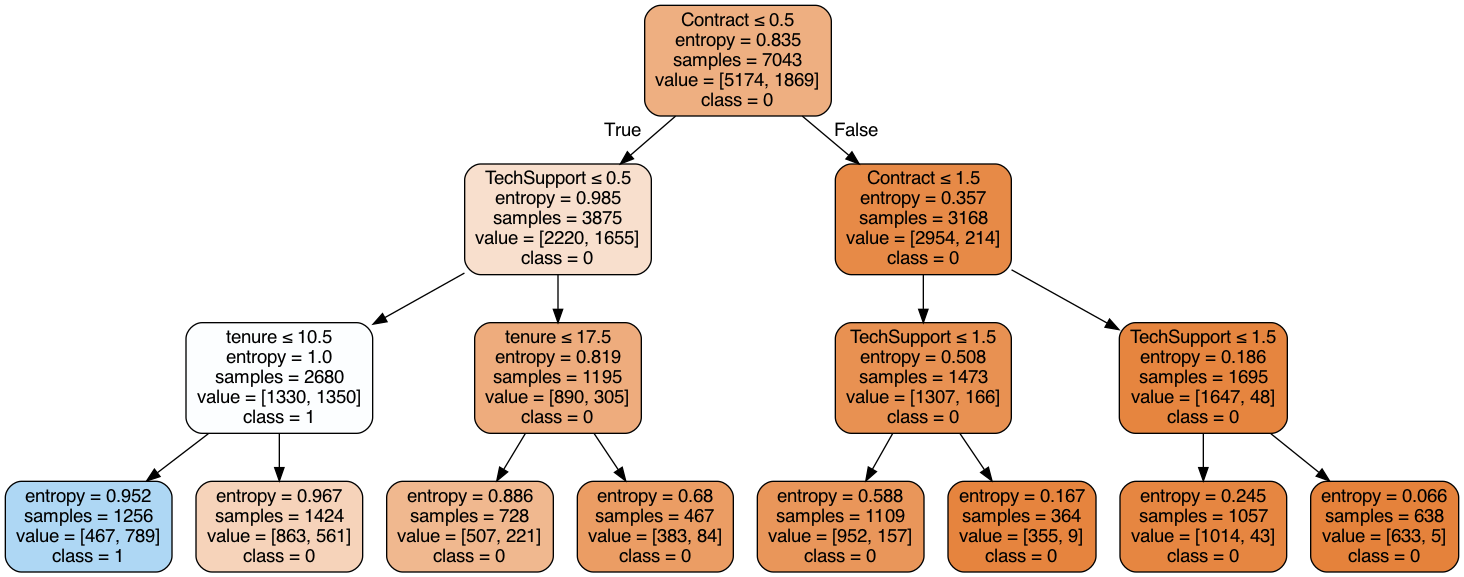

In [21]:
#StringIO: "This module implements a file-like class that reads and writes a string buffer (also known as memory files)."
dot_data= StringIO()

#Function to generate the graphic of decision tree
export_graphviz(model,out_file=dot_data, filled=True, rounded=True, 
                     special_characters=True, feature_names=features, class_names= ['0', '1'])

#Load graph
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create PNG image
Image(graph.create_png())

**Explanation of the Decision Tree Graphic:**

**Depth 0:** The root node is CONTRACT, and it ask the question, "is the contract value less or equal than 0.5?", which is the same as "is the contract Month-to-month?". If the answer is NO, then take the 'False' way and all the results will be class = 0, which means NO CHURN.

**Depth 1:** If the contract is Month-to-month, then we need to evaluate the TechSupport value.

**Depth 2:** At this level we evaluate TENURE. 

**Depth 3 (final stage):** The light blue box is the only one who result class=1, which means CHURN customer. Certain inputs are required to determine that a customer is churn, such as Contract=0, TechSupport=0, Tenure<=10.5.


To save Decision Tree in PDF format

In [22]:
#graph.write_pdf("DecisionTree.pdf")

To save Decision Tree in PNG format:

In [23]:
#graph.write_png("DecisionTree.png")

6) Calculating the **ACCURACY** of the Decision Tree Predictive Model:

As it is shown, the accuracy of this model against the training data (7000+ entries) is:

**78.03%**

In [24]:
model.score(inputs, target)

0.7803492829760046

7) Finally, **TESTING** the model with some values:

Considering that: 


- SENIOR CITIZEN... No = 0, Yes = 1

- FOR TENURE... Any positive integer (in this case from 0 to 72 months)

- FOR TECHSUPPORT.. No = 0, Yes = 1, No internet service = 2

- FOR CONTRACT... Month-to-month = 0, One year = 1, Two year = 2

- FOR CHURN... No = 0, Yes = 1

**TEST 1**

- An imaginary customer who is a Senior Citizen, has 5 months of tenure, has TechSupport, on a Two year contract:

RESULT = '0' -> This customer IS NOT likely to churn.

In [25]:
model.predict([[1,5,1,2]])

array([0])

**TEST 2**

- An imaginary customer who is not a Senior Citizen, has 1 month of tenure, does not has TechSupport, on a Month-to-month contract:

RESULT = '1' -> This customer IS likely to churn

In [26]:
model.predict([[0,1,0,0]])

array([1])

**TEST 3**

- Randomly taking a real customer from the database and comparing the real result and the prediction. 

The row number 50 in the Excel database shows a customer with the following attributes:
- SeniorCitizen = 0 (No)
- Tenure = 52 months
- TechSupport = Yes (1)
- Contract = Two year (2)
- The real outcome was Churn = 0 (NO)

In [27]:
model.predict([[0,52,1,2]])

array([0])

Result -> The prediction also shows '0' (NO CUSTOMER CHURN)

**TEST 4**

- Finally, randomly taking another customer from the database and comparing the real result and the prediction. 

The row number 1500 in the Excel database shows a customer with the following attributes:
- SeniorCitizen = 1 (Yes)
- Tenure = 15 months
- TechSupport = No (0)
- Contract = Mont-to-month (0)
- The real outcome was Churn = 1 (YES)

In [28]:
model.predict([[1,15,0,0]])

array([0])

Result -> The model predicted that the customer WILL NOT CHURN, so in this case it was not accurate enough. This can be improved through other predictive model techniques, loading more data, extending the max_depth of the model, adding more attributes, etc.

If the 'Tenure' of this customer would have been 11 months or less, then the model would predicted YES CHURN. 

# END OF THE NOTEBOOK. 

# PREPARED BY GONZALO SANCHEZ 

# www.linkedin.com/in/gonzalosanchez1